<a href="https://colab.research.google.com/github/SarahGraceMaclean/Ramp-Technical-Assessment/blob/main/Ramp_Test_Sarah_Maclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retention Analysis**

*Remember to upload the csv data file from the Git Repo*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [ ]:
a = pd.read_csv('demo_test_data.csv')

1) Weighted Retention curve for last 180 days

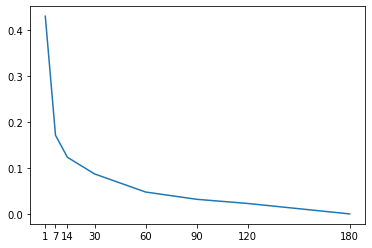

In [ ]:
a_series = a.iloc[819:999,:12]    #excluded last day as it has no retention rate yet

lst = []

for i in range(8):
  i += 4
  weighted = (a_series.iloc[:,i] * a_series["DNU"]).sum(skipna = True) / a_series["DNU"].sum(skipna = True)
  # need to exclude DNU values from denimonator when the Dx value is Null
  lst.append(weighted)

cols = a.iloc[1:2,4:12].columns

col = []

for i in cols:
    col_num = i.replace('D','')
    col.append(int(col_num))


a_sumdf = pd.DataFrame({'Dx': col , 'Weighted': lst})
a_sumdf.set_index('Dx', inplace=True)

tickvalues = a_sumdf.index
plt.xticks(ticks = tickvalues)
plt.plot(a_sumdf)
plt.show()


2) Fit Power Curve to Weighted Retention Curve

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


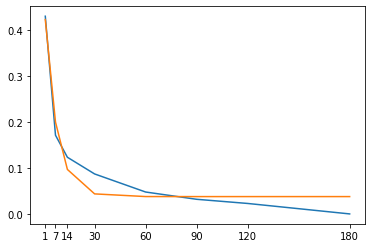

In [ ]:
x = a_sumdf.index
y = a_sumdf['Weighted']
popt, pcov = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-b*t) + c,  x,  y) #,  p0=(4, 0.1, 1))

a = popt[0]
b = popt[1]
c = popt[2]

plt.xticks(ticks = tickvalues)
plt.plot(a_sumdf)
plt.plot(x, a * np.exp(-b * x) + c)
plt.show()

3) Polt Predicted Daily Active Users against actual data

             0            1            2    ...         995         996         997
0     196.471865   172.451436   151.657343  ...   17.637088   17.637088   17.637088
1     192.821329   169.247211   148.839481  ...   17.309383   17.309383   17.309383
2     256.371121   225.027476   197.893794  ...   23.014186   23.014186   23.014186
3     234.955643   206.230231   181.363110  ...   21.091739   21.091739   21.091739
4     215.897719   189.502307   166.652230  ...   19.380928   19.380928   19.380928
..           ...          ...          ...  ...         ...         ...         ...
995  1373.101652  1205.227789  1059.902126  ...  123.261999  123.261999  123.261999
996  1716.810515  1506.915193  1325.212239  ...  154.116409  154.116409  154.116409
997  1757.714682  1542.818463  1356.786313  ...  157.788336  157.788336  157.788336
998  1443.901307  1267.371558  1114.552636  ...  129.617615  129.617615  129.617615
999  1351.567511  1186.326388  1043.279845  ...  121.328900  121.328900  121

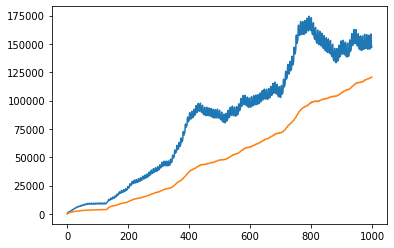

In [ ]:
all_data = pd.read_csv('demo_test_data.csv')

lst_act = []
lst_acte = []

for i in range(len(all_data)):
  tot_new_users = all_data.iloc[i , 1]
  for ii in range(1, 999, 1):          # the curve flatens out after about 40 days and therefore no need to plot all days after this
    func = a * np.exp(-b * int(ii)) + c
    val = func * tot_new_users
    lst_acte.append(val)
  lst_act.append(lst_acte)
  lst_acte = []

newdf = pd.DataFrame(lst_act)
print(newdf)


pred = []

for i in range(len(newdf)):
  df = newdf.iloc[0:i , 0:i]
  df = np.flipud(df)
  day = np.asarray(df)
  daysum = np.trace(day)
  pred.append(daysum)

plt.plot(all_data["DAU"])
plt.plot(pred)
plt.show()

[0.0, 196.47186547572602, 365.2727656570593, 577.275674014335, 742.4788355342124, 869.2675571369712, 955.2778731553104, 1037.677734416758, 1121.9191396383485, 1212.2483935495907, 1325.091177497006, 1407.4644666603945, 1462.8074184835643, 1528.1361827651926, 1589.3841403717663, 1642.4249178723246, 1688.9668988244252, 1782.6251228187698, 1874.6695962434212, 1921.668401890644, 1973.303313228373, 2019.5239866214672, 2058.9021650917316, 2124.870056583808, 2218.010133386495, 2281.3370913548474, 2321.589700762715, 2348.8100857774657, 2381.16780142471, 2412.7495485752347, 2467.1725814687893, 2540.40715345205, 2605.0944888873637, 2622.269280073603, 2656.221152182199, 2661.226257519429, 2679.4870936918373, 2702.4825064839824, 2751.139080676433, 2808.9754470094726, 2816.138506958182, 2823.0508200934846, 2839.3502837495244, 2864.0057982629073, 2894.395905486098, 2943.901580715637, 2988.033956357151, 2985.6063742259207, 2977.5849275268592, 2987.542834314064, 2991.4930126677423, 3031.5580885920804, 

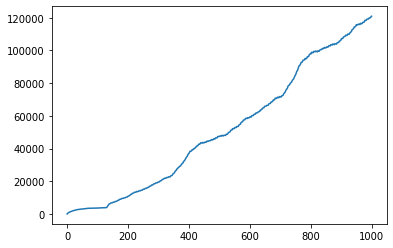

In [ ]:
pred = []

for i in range(len(newdf)):
  df = newdf.iloc[0:i , 0:i]
  df = np.flipud(df)
  day = np.asarray(df)
  daysum = np.trace(day)
  pred.append(daysum)

print(pred)

plt.plot(pred)

Observation

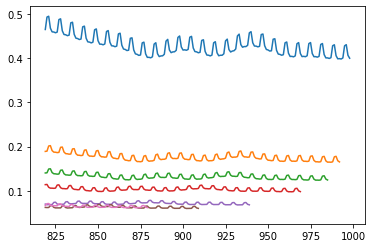

In [ ]:
#### retention rate increases over weekends
a_series = a.iloc[819:,4:12]

plt.plot(a_series)
plt.show()

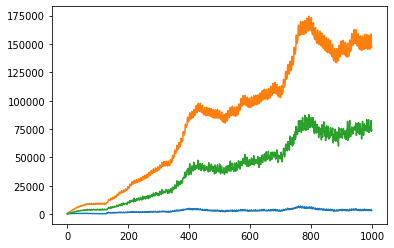

In [ ]:
plt.plot(a_foi)
plt.show()
#a_foi.plot(kind='bar')

In [ ]:
a_series = a.iloc[819:999,:12]    #excluded last day as it has no retention rate yet
print(a_series)

           DATE          DNU      Revenue  ...       D90      D120      D180
819  2020/03/13  3949.068119  71742.60364  ...  0.062101  0.066212  0.047372
820  2020/03/14  4134.032194  78918.65186  ...  0.061793  0.070568       NaN
821  2020/03/15  5044.126857  75772.73234  ...  0.061949  0.070980       NaN
822  2020/03/16  4933.644411  75365.36630  ...  0.065992  0.067105       NaN
823  2020/03/17  4304.254429  72822.45157  ...  0.066202  0.065953       NaN
..          ...          ...          ...  ...       ...       ...       ...
994  2020/09/04  3316.199803  77416.41212  ...       NaN       NaN       NaN
995  2020/09/05  3242.426820  76595.58210  ...       NaN       NaN       NaN
996  2020/09/06  4054.057069  73690.67088  ...       NaN       NaN       NaN
997  2020/09/07  4150.647710  82454.03866  ...       NaN       NaN       NaN
998  2020/09/08  3409.612332  73057.44387  ...       NaN       NaN       NaN

[180 rows x 12 columns]


In [ ]:
# Create a weighted data frame and reset the index
weighted = a_series

# Add a Total Subs column which sums up all of the subscribers within each Cohort Period.
weighted = weighted.drop('DATE', axis=1).drop('Revenue', axis=1).drop('DAU', axis=1)

# Count non-NaN values in the row, call n
# Add up first n values of the first row, n_sum
# Divide the value in the total subs column of that row by n_sum
weighted['Dx'] = weighted['DNU'].count() - weighted.isnull().sum(axis=1)



def calc_sum(col_end):
    ans = 0 
    for i in range(1,int(col_end)):
      ans = ans + weighted.iloc[0 , i]
    return ans


def calc_ret_pct(total_subs, num_months):
    sum_initial = calc_sum(1 + num_months)
    
    return total_subs / sum_initial

# Create a retention percentage column with use of a lambda function to apply calc ret pct for each row
weighted['Ret_Pct'] = weighted.apply(lambda row: calc_ret_pct(row['DNU'], row['Dx']), axis=1)

print(weighted)

# weighted
# Grab only the Cohort Period and Ret Pct columns
weighted_avg = weighted.filter(items=['CohortPeriod', 'Ret_Pct'])


        

weighted_avg['Ret_Pct'] = pd.Series(["{0:.2f}%".format(val * 100) for val in weighted_avg['Ret_Pct']], index = weighted_avg.index)
weighted_avg['CohortPeriod'] = weighted_avg['CohortPeriod'].astype(int)
# Transpose the values to run across the row rather that column
weighted_avg_transpose = weighted_avg.transpose()
# Import necessary libraries in order to plot weighted average retention using Plotly
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode()
trace = go.Scatter(
    x = weighted_avg['CohortPeriod'],
    y = weighted_avg['Ret_Pct']
)
data = [trace]
layout = go.Layout(
    title = 'Monthly Retention Curve',
    yaxis=dict(
        ticksuffix='%'
    )
)
fig = dict(data=data, layout=layout)
iplot(fig)

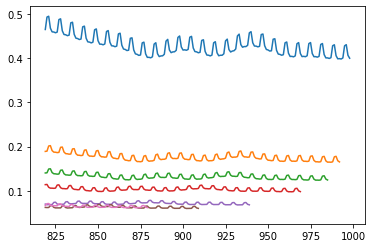

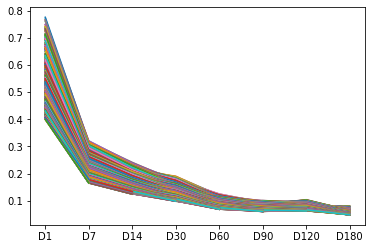

                                                       Sum
DATE     2017/12/152017/12/162017/12/172017/12/182017/1...
DNU                                            2.91394e+06
Revenue                                        3.95028e+07
DAU                                            8.31234e+07
D1                                                 531.133
D7                                                 217.577
D14                                                162.187
D30                                                124.949
D60                                                83.0506
D90                                                70.1642
D120                                               69.3767
D180                                                49.201
D270                                                45.832
D365                                               28.1534
D540                                               25.3028
D730                                               12.48

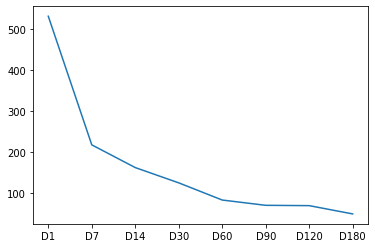

In [ ]:
for i in range(len(a)):

  plt.plot(a.iloc[i,4:12])
plt.show()

#a.sum(axis = 0 , skipna = True)

#cols = a.columns

#lst = []

#for i in cols:
#    aa = i.replace('D','')
#    lst.append(aa)


#a_sumdf = pd.DataFrame({'D': a.iloc[:,] ,'Sum': a.sum(axis = 0 , skipna = True)})
a_sumdf = pd.DataFrame({'Sum': a.sum(axis = 0 , skipna = True)})

#a_sumdf['Cols'] = lst

print(a_sumdf)

plt.plot(a_sumdf.iloc[4:12,0])
plt.show()



             0            1            2    ...         176         177         178
0     196.471865   172.451436   151.657343  ...   17.637088   17.637088   17.637088
1     192.821329   169.247211   148.839481  ...   17.309383   17.309383   17.309383
2     256.371121   225.027476   197.893794  ...   23.014186   23.014186   23.014186
3     234.955643   206.230231   181.363110  ...   21.091739   21.091739   21.091739
4     215.897719   189.502307   166.652230  ...   19.380928   19.380928   19.380928
..           ...          ...          ...  ...         ...         ...         ...
995  1373.101652  1205.227789  1059.902126  ...  123.261999  123.261999  123.261999
996  1716.810515  1506.915193  1325.212239  ...  154.116409  154.116409  154.116409
997  1757.714682  1542.818463  1356.786313  ...  157.788336  157.788336  157.788336
998  1443.901307  1267.371558  1114.552636  ...  129.617615  129.617615  129.617615
999  1351.567511  1186.326388  1043.279845  ...  121.328900  121.328900  121

TypeError: ignored

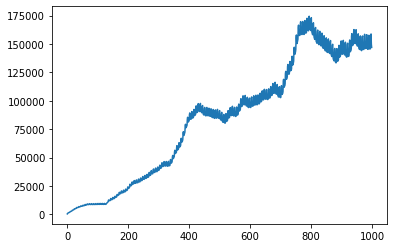

In [ ]:
for i in range(len(all_data)):
  df = all_data[1:i, 0:i]
  print(df)
  day = np.asarray(newdf)
  daysum = np.trace(day)

  print(daysum)



for i in range(len(all_data)):
  for ii in range(len(a)):
    tot_new_users = a.iloc[i , 1]
    
    func = a * np.exp(-b * int(ii)) + c
    val = func * all_data.iloc[i , 1]

    lst_acte.append(val)
  lst_act.append(lst_acte)
  lst_acte = []

#print(lst_act)

newdf = pd.DataFrame(lst_act)
print(newdf)





sum = 0

for i in range(len(newdf)):
  for ii in range(1, 4 , 1):
    while i - ii >= 0:
      sum += newdf.iloc[i- ii, ii]
  print(sum)
  sum = 0



day = np.asarray(newdf)



daysum = np.trace(day)

print(daysum)
